# How is Airbnb really being used in and affecting the neighbourhoods of your city?

- Summary
- Background
- Problem Statement
- Approach
- Findings
- Model/Analysis Design

In [1]:
#Import Libraries
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
#Create dataframes
dec_listing_df = pd.read_csv('https://raw.githubusercontent.com/112523chen/CST3512FinalPresentation/master/listings_Dec_21.csv', low_memory=False)
mar_listing_df = pd.read_csv('https://raw.githubusercontent.com/112523chen/CST3512FinalPresentation/master/listings_Mar_22.csv', low_memory=False)
jun_listing_df = pd.read_csv('https://raw.githubusercontent.com/112523chen/CST3512FinalPresentation/master/listings_Jun_22.csv', low_memory=False)
sep_listing_df = pd.read_csv('https://raw.githubusercontent.com/112523chen/CST3512FinalPresentation/master/listings_Sep_22.csv', low_memory=False)

sep_listing_df.head()

id                         listing_url       scrape_id last_scraped  \
0   2539   https://www.airbnb.com/rooms/2539  20220907064715   2022-09-07   
1   2595   https://www.airbnb.com/rooms/2595  20220907064715   2022-09-07   
2   5121   https://www.airbnb.com/rooms/5121  20220907064715   2022-09-07   
3  45910  https://www.airbnb.com/rooms/45910  20220907064715   2022-09-07   
4   5136   https://www.airbnb.com/rooms/5136  20220907064715   2022-09-07   

        source                                      name  \
0  city scrape        Clean & quiet apt home by the park   
1  city scrape                     Skylit Midtown Castle   
2  city scrape                           BlissArtsSpace!   
3  city scrape        Beautiful Queens Brownstone! - 5BR   
4  city scrape  Spacious Brooklyn Duplex, Patio + Garden   

                                         description  \
0  Renovated apt home in elevator building.<br />...   
1  Beautiful, spacious skylit studio in the heart...   
2  One room available for rent in a 2 bedroom apt...   
3  <b>The space</b><br />Beautiful, fully furnish...   
4  We welcome you to stay in our lovely 2 br dupl...   

                               neighborhood_overview  \
0    Close to Prospect Park and Historic Ditmas Park   
1  Centrally located in the heart of Manhattan ju...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/3949d073-a02e...     2787  ...   
1  https://a0.muscache.com/pictures/f0813a11-40b2...     2845  ...   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356  ...   
3  https://a0.muscache.com/pictures/27117627/19ff...   204539  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...     7378  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        5.00                   4.75                4.88   
1                        4.80                   4.81                4.40   
2                        4.91                   4.47                4.52   
3                        5.00                   4.82                4.55   
4                        5.00                   4.67                5.00   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              9   
1     NaN                f                              3   
2     NaN                f                              2   
3     NaN                f                              6   
4     NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           3   
2                                           0   
3                                           6   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            6   
1                                            0   
2                                            2   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           2              0.11  
1                                           0              0.31  
2                                           0              0.31  
3                                           0              0.10  
4                                           0              0.03  

[5 rows x 75 columns]

In [40]:
sep_listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
#Data Preprocessing 
sep_listing_df['host_response_rate'] = pd.to_numeric(sep_listing_df['host_response_rate'].str.replace("%",''))
sep_listing_df['instant_bookable'] = np.where(sep_listing_df['instant_bookable'] == 't', True, False)
sep_listing_df['price'] = sep_listing_df['price'].str.replace("$","")
sep_listing_df['price'] = pd.to_numeric(sep_listing_df['price'].str.replace(",",""))

/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_17729/1267522655.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sep_listing_df['price'] = sep_listing_df['price'].str.replace("$","")


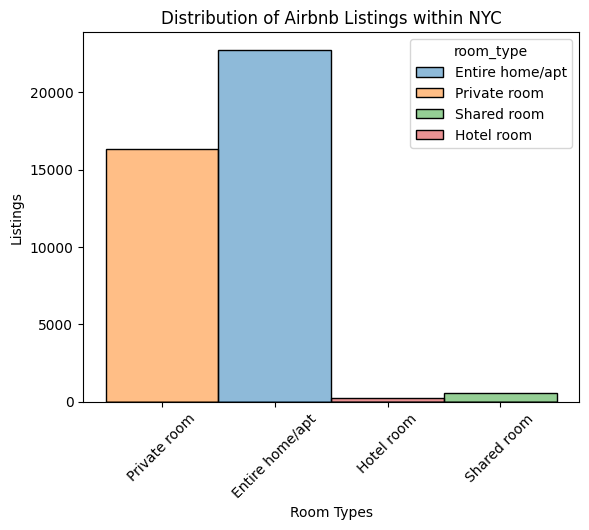

In [5]:
# Distribution of Airbnb Listings within NYC in Sep 22
sns.histplot(data=sep_listing_df, x='room_type', hue='room_type', hue_order=sep_listing_df.room_type.value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Room Types")
plt.ylabel("Listings")
plt.title("Distribution of Airbnb Listings within NYC")
plt.show()

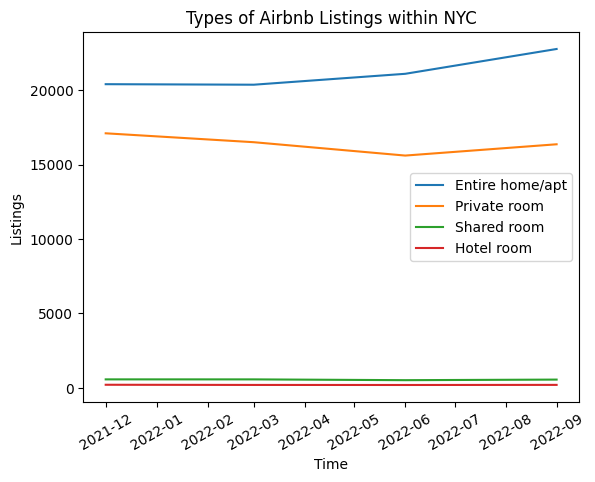

In [7]:
sep_room_type_dict = dict(sep_listing_df.room_type.value_counts())
jun_room_type_dict = dict(jun_listing_df.room_type.value_counts())
mar_room_type_dict = dict(mar_listing_df.room_type.value_counts())
dec_room_type_dict = dict(dec_listing_df.room_type.value_counts())
d = {}
for room_type in sep_room_type_dict.keys():
    values = []
    for dictionary in [dec_room_type_dict, mar_room_type_dict, jun_room_type_dict, sep_room_type_dict]:
        values.append(dictionary[room_type])
    d[room_type] = values
d['Time'] = pd.to_datetime(['12-01-21','3-01-22','6-01-22','9-01-22'])
room_type_df = pd.DataFrame(d)

#Time Series of Number of Room Types over the past year
for room_type in sep_room_type_dict.keys():
    sns.lineplot(data=room_type_df, x='Time', y=f"{room_type}", label=f"{room_type}")
plt.xticks(rotation=30)
plt.ylabel("Listings")
plt.title("Types of Airbnb Listings within NYC")
plt.show()

In [49]:
fig = px.scatter_mapbox(sep_listing_df, 
    lat="latitude", 
    lon="longitude", 
    hover_name="id", 
    hover_data=["neighbourhood_cleansed","host_neighbourhood",'host_name','price'], 
    color_discrete_sequence=px.colors.qualitative.G10,
    color='room_type'
    )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

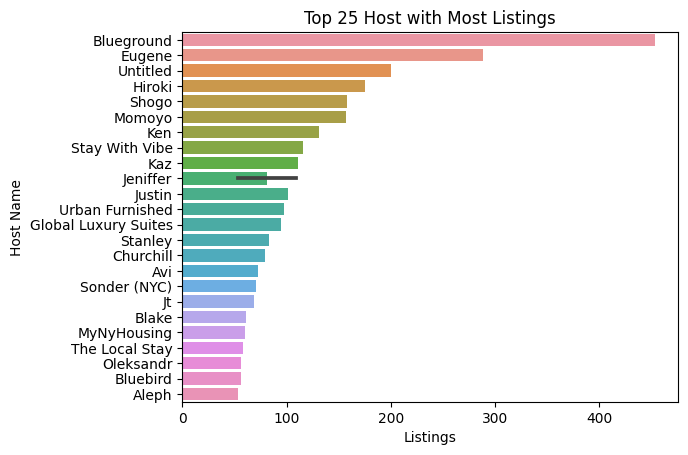

In [38]:
#Top 25 Host with the Most Listing 
top25Count = sep_listing_df.groupby(['host_id'])['id'].count().sort_values(ascending=False).head(25)
findHostName = lambda hostID: sep_listing_df[sep_listing_df['host_id'] == hostID]['host_name'].iloc[0]
findHostName = np.vectorize(findHostName)
top25Count.index = findHostName(top25Count.index)
top25Count = pd.DataFrame(top25Count)
top25Count.reset_index(inplace=True)
top25Count.columns = ['host_name','Count']

sns.barplot(data=top25Count, y='host_name', x='Count')
plt.title("Top 25 Host with Most Listings")
plt.ylabel("Host Name")
plt.xlabel("Listings")
plt.show()

In [46]:
sep_listing_df[sep_listing_df['host_name'] == 'Blueground'].groupby(['neighbourhood_group_cleansed','room_type'])['id'].count()

neighbourhood_group_cleansed  room_type      
Brooklyn                      Entire home/apt     19
Manhattan                     Entire home/apt    420
Queens                        Entire home/apt     14
Name: id, dtype: int64

In [48]:
sep_listing_df[sep_listing_df['host_name'] == 'Blueground'].groupby(['neighbourhood_group_cleansed','property_type'])['id'].count()

neighbourhood_group_cleansed  property_type     
Brooklyn                      Entire rental unit     19
Manhattan                     Entire rental unit    420
Queens                        Entire rental unit     14
Name: id, dtype: int64